<a href="https://colab.research.google.com/github/rramachandra123/Image-of-Classification/blob/main/Image_Classification_Rameshvarman_Ramachandran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import TensorFlow**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Download and Explore the Pathway of Dataset**

In [3]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/train')

**Image Count**

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2000


**Some Cats Photos**

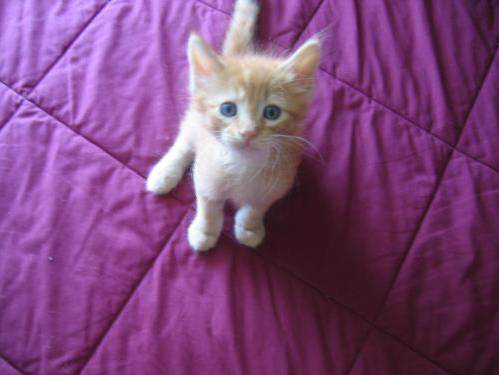

In [13]:
cats = list(data_dir.glob('cats/*'))
PIL.Image.open(str(cats[0]))

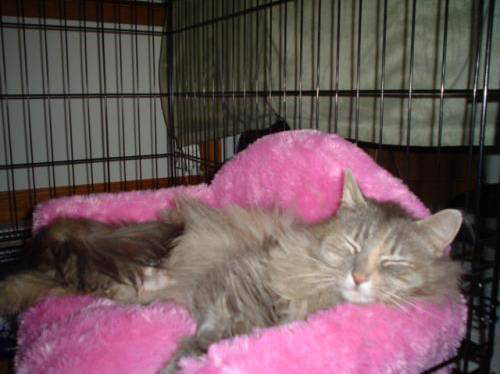

In [14]:
PIL.Image.open(str(cats[1]))

**Some Dogs Photos**

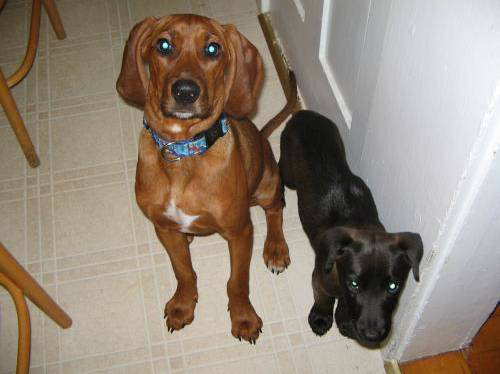

In [15]:
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[0]))

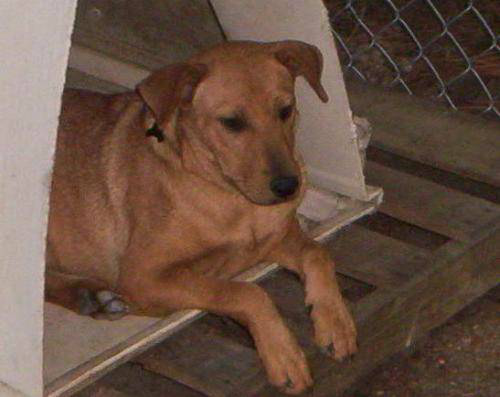

In [17]:
PIL.Image.open(str(dogs[1]))

**Create a Dataset**

In [19]:
batch_size = 40
img_height = 180
img_width = 180

** Let's use 80% of the images for training, and 20% for validation.**

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [21]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 400 files for validation.


**Class Names**

In [22]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


**Visualize the Data**

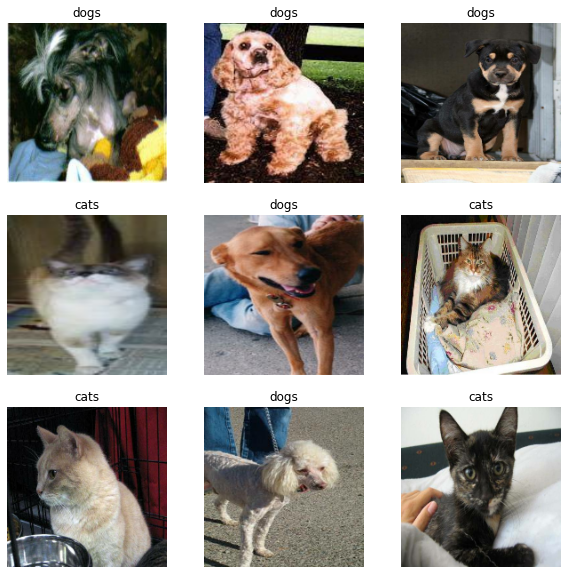

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(40, 180, 180, 3)
(40,)


**Configure the dataset for performance**

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Standardize the data**

In [26]:
normalization_layer = layers.Rescaling(1./255)

**There are two ways to use this layer. You can apply it to the dataset by calling Dataset.map:**



In [27]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.92325366


**Create a Model**

In [28]:
num_classes = 5

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**Compile the model**

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Summary**

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

**Train the Model**

In [31]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
40/40 [==============================] - 84s 2s/step - loss: 0.8604 - accuracy: 0.4900 - val_loss: 0.6921 - val_accuracy: 0.5950
Epoch 2/10
40/40 [==============================] - 49s 1s/step - loss: 0.6580 - accuracy: 0.6019 - val_loss: 0.6492 - val_accuracy: 0.6100
Epoch 3/10
40/40 [==============================] - 49s 1s/step - loss: 0.5692 - accuracy: 0.7075 - val_loss: 0.5832 - val_accuracy: 0.7100
Epoch 4/10
40/40 [==============================] - 49s 1s/step - loss: 0.4973 - accuracy: 0.7525 - val_loss: 0.5581 - val_accuracy: 0.7125
Epoch 5/10
40/40 [==============================] - 49s 1s/step - loss: 0.4287 - accuracy: 0.7931 - val_loss: 0.5917 - val_accuracy: 0.6900
Epoch 6/10
40/40 [==============================] - 49s 1s/step - loss: 0.3436 - accuracy: 0.8537 - val_loss: 0.5817 - val_accuracy: 0.7450
Epoch 7/10
40/40 [==============================] - 50s 1s/step - loss: 0.2720 - accuracy: 0.8819 - val_loss: 0.6528 - val_accuracy: 0.7125
Epoch 8/10
40/40 [==

# Visualize the Training Results

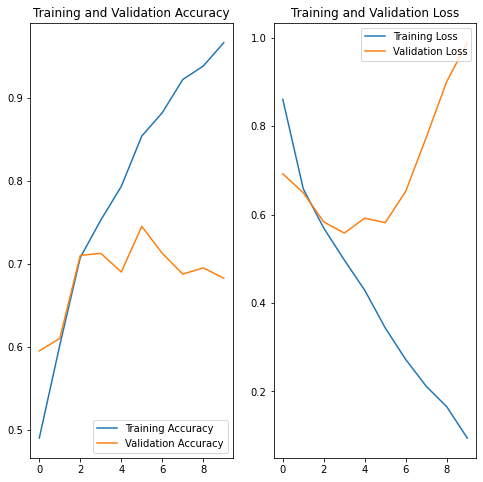

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Data Argumentation

In [33]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

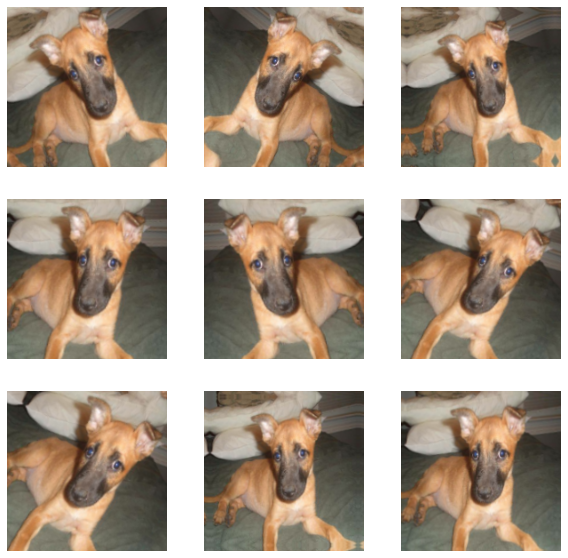

In [34]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Dropout

In [35]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compile and Train the Model

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [38]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
40/40 [==============================] - 58s 1s/step - loss: 1.1657 - accuracy: 0.5150 - val_loss: 0.6720 - val_accuracy: 0.6050
Epoch 2/20
40/40 [==============================] - 57s 1s/step - loss: 0.6906 - accuracy: 0.5663 - val_loss: 0.6653 - val_accuracy: 0.6425
Epoch 3/20
40/40 [==============================] - 57s 1s/step - loss: 0.6734 - accuracy: 0.5956 - val_loss: 0.6551 - val_accuracy: 0.5900
Epoch 4/20
40/40 [==============================] - 57s 1s/step - loss: 0.6534 - accuracy: 0.6237 - val_loss: 0.6354 - val_accuracy: 0.6350
Epoch 5/20
40/40 [==============================] - 57s 1s/step - loss: 0.6319 - accuracy: 0.6500 - val_loss: 0.6046 - val_accuracy: 0.6925
Epoch 6/20
40/40 [==============================] - 57s 1s/step - loss: 0.6198 - accuracy: 0.6550 - val_loss: 0.6393 - val_accuracy: 0.6175
Epoch 7/20
40/40 [==============================] - 57s 1s/step - loss: 0.6220 - accuracy: 0.6544 - val_loss: 0.6092 - val_accuracy: 0.7000
Epoch 8/20
40/40 [==

# Visualize Training Results

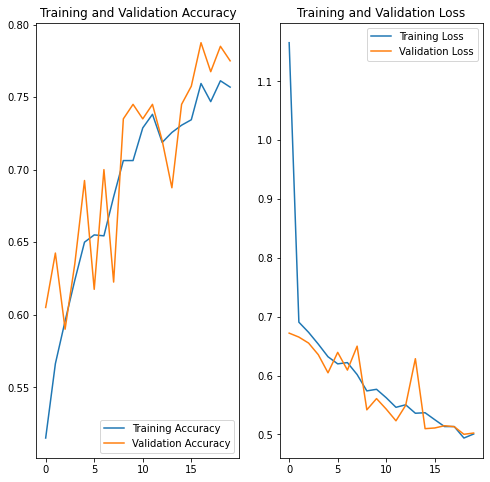

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()